# 평가문항

##### 1. 3가지 데이터셋의 구성을 파악하고, 데이터를 이해하는 과정이 포함되어있는가?<br/>
feature와 label 선정을 위한 데이터 분석과정을 전개함<br/><br/>

##### 2. 3가지 데이터셋에 대해 각각 5가지 모델을 이용하여 학습을 수행하고 결과값을 얻었는가?<br/>
모델학습 및 테스트가 정상적으로 수행되고, 결과값을 얻었음<br/><br/>

##### 3. 3가지 데이터셋에 대해 모델의 평가 지표를 선택하고, 그 이유를 근거를 바탕으로 서술하였는가?<br/>
모델학습을 통해 얻은 결과물을 바탕으로 평가지표를 선택하고, 본인의 의견을 서술하였음

# 모듈 import

In [1]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 손글씨 이미지 데이터

In [2]:
digits = load_digits()

In [3]:
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


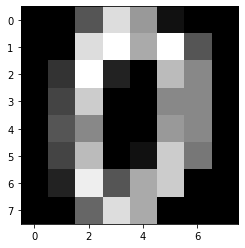

In [6]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                   digits.target,
                                                   test_size=0.2,
                                                   random_state=10)

print("X_train : ", len(X_train), " X_test : ", len(X_test))
print("y_train : ", len(y_train), " y_test : ", len(y_test))

X_train :  1437  X_test :  360
y_train :  1437  y_test :  360


## Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) 
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [9]:
pred_dtree = decision_tree.predict(X_test)
print(classification_report(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        37
           1       0.83      0.88      0.86        34
           2       0.85      0.82      0.84        34
           3       0.80      0.90      0.85        40
           4       0.76      0.76      0.76        34
           5       0.91      0.91      0.91        32
           6       0.89      0.89      0.89        37
           7       0.95      0.90      0.92        40
           8       0.77      0.73      0.75        33
           9       0.85      0.87      0.86        39

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360



In [72]:
#roc_auc = roc_auc_score(y_test, pred_dtree)
#print(f'검증 데이터 roc auc : {roc_auc:.4f}')

#y_test에 2개 이상의 변수가 있어 에러가 뜨기에 사용하지 않음

## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=10)
randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [74]:
pred_rforest = randomforest.predict(X_test)
print(classification_report(y_test, pred_rforest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.94      0.91      0.93        34
           2       0.97      1.00      0.99        34
           3       0.97      0.97      0.97        40
           4       0.97      0.94      0.96        34
           5       0.94      1.00      0.97        32
           6       1.00      1.00      1.00        37
           7       0.93      1.00      0.96        40
           8       0.94      0.91      0.92        33
           9       1.00      0.95      0.97        39

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



## SVM(support vector machine)

####  기본 SVC

In [78]:
from sklearn import svm

svm_svc = svm.SVC(kernel = "linear", C=1)
svm_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [79]:
pred_svm_svc = svm_svc.predict(X_test)
print(classification_report(y_test, pred_svm_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        34
           2       0.97      1.00      0.99        34
           3       1.00      0.97      0.99        40
           4       0.97      1.00      0.99        34
           5       0.89      1.00      0.94        32
           6       1.00      0.97      0.99        37
           7       0.97      0.97      0.97        40
           8       0.97      0.91      0.94        33
           9       1.00      0.92      0.96        39

    accuracy                           0.97       360
   macro avg       0.97      0.98      0.97       360
weighted avg       0.98      0.97      0.98       360



####  Linear SVC

In [85]:
l_svc = svm.LinearSVC(C=1, max_iter = 10000)
l_svc.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1, max_iter=10000)

In [86]:
pred_lsvc = l_svc.predict(X_test)
print(classification_report(y_test, pred_lsvc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.79      0.91      0.85        34
           2       0.94      1.00      0.97        34
           3       0.93      0.95      0.94        40
           4       0.94      0.91      0.93        34
           5       0.93      0.88      0.90        32
           6       1.00      0.97      0.99        37
           7       1.00      0.95      0.97        40
           8       0.82      0.85      0.84        33
           9       1.00      0.90      0.95        39

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360



## SGD Classifier

In [88]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=10000)
sgd.fit(X_train, y_train)

SGDClassifier(max_iter=10000)

In [90]:
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.86      0.94      0.90        34
           2       0.94      1.00      0.97        34
           3       0.91      0.97      0.94        40
           4       1.00      0.88      0.94        34
           5       0.97      0.94      0.95        32
           6       1.00      1.00      1.00        37
           7       0.95      0.97      0.96        40
           8       0.81      0.88      0.84        33
           9       1.00      0.85      0.92        39

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



## Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

l_regression = LogisticRegression()
l_regression.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
pred_l_regression = l_regression.predict(X_test)
print(classification_report(y_test, pred_l_regression))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.91      0.91      0.91        34
           2       0.92      1.00      0.96        34
           3       1.00      0.95      0.97        40
           4       0.94      0.91      0.93        34
           5       0.94      0.94      0.94        32
           6       0.97      0.97      0.97        37
           7       0.97      0.95      0.96        40
           8       0.89      0.94      0.91        33
           9       0.97      0.92      0.95        39

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



## accuracy
Decision Tree 0.86<br/>
Random Forest 0.97<br/>
기본 SVC 0.97<br/>
Linear SVC 0.93<br/>
SGD Classifier 0.94<br/>
Logistic Regression 0.95

Random Forest와 기본 SVC의 정확도가 가장 높게 나왔기에 손글씨 분류에 적합해 보인다.


# 와인 분류

In [104]:
wine = load_wine()

In [106]:
print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [113]:
wine.data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [110]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [139]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [140]:
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [111]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [112]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [114]:
X_train, X_test, y_train, y_test = train_test_split(wine.data,
                                                   wine.target,
                                                   test_size=0.2,
                                                   random_state=32)

print("X_train : ", len(X_train), " X_test : ", len(X_test))
print("y_train : ", len(y_train), " y_test : ", len(y_test))

X_train :  142  X_test :  36
y_train :  142  y_test :  36


## Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) 
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [116]:
pred_dtree = decision_tree.predict(X_test)
print(classification_report(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.89      0.80      0.84        10
           2       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.91      0.90      0.90        36
weighted avg       0.92      0.92      0.91        36



## Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=32)
randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

In [119]:
pred_rforest = randomforest.predict(X_test)
print(classification_report(y_test, pred_rforest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## SVM(support vector machine)

#### SVC

In [120]:
from sklearn import svm

svm_svc = svm.SVC(kernel = "linear", C=1)
svm_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [121]:
pred_svm_svc = svm_svc.predict(X_test)
print(classification_report(y_test, pred_svm_svc))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       0.88      0.70      0.78        10
           2       0.90      0.90      0.90        10

    accuracy                           0.89        36
   macro avg       0.89      0.87      0.87        36
weighted avg       0.89      0.89      0.88        36



#### Linear SVC

In [124]:
l_svc = svm.LinearSVC(C=1, max_iter = 1000)
l_svc.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1)

In [125]:
pred_lsvc = l_svc.predict(X_test)
print(classification_report(y_test, pred_lsvc))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        16
           1       1.00      0.70      0.82        10
           2       0.75      0.30      0.43        10

    accuracy                           0.72        36
   macro avg       0.80      0.67      0.68        36
weighted avg       0.77      0.72      0.69        36



# SGD Classifier

In [126]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=10000)
sgd.fit(X_train, y_train)

SGDClassifier(max_iter=10000)

In [127]:
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.56      1.00      0.71        10
           2       0.75      0.30      0.43        10

    accuracy                           0.72        36
   macro avg       0.74      0.70      0.67        36
weighted avg       0.78      0.72      0.70        36



# Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression

l_regression = LogisticRegression()
l_regression.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [130]:
pred_l_regression = l_regression.predict(X_test)
print(classification_report(y_test, pred_l_regression))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.89      0.80      0.84        10
           2       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.91      0.90      0.90        36
weighted avg       0.92      0.92      0.91        36



## accuracy
Decision Tree : 0.92<br/>
Random Forest : 0.97<br/>
SVC : 0.89<br/>
Linear SVC : 0.72<br/>
SGD Classifier : 0.72<br/>
Logistic Regression : 0.92<br/>

Random Forest가 가장 높으며 다음으로 Decision Tree와 Logistic Regression이 와인 분류에 적합해 보인다.


# 유방암 여부 체크

In [131]:
b_cancer = load_breast_cancer()

In [133]:
print(dir(b_cancer))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [135]:
b_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [142]:
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [144]:
b_cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [151]:
b_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [152]:
b_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [155]:
cancer_def = pd.DataFrame(data=b_cancer.data, columns=b_cancer.feature_names)
cancer_def['label'] = b_cancer.target
cancer_def

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [160]:
X_train, X_test, y_train, y_test = train_test_split(b_cancer.data,
                                                   b_cancer.target,
                                                   test_size=0.2,
                                                   random_state=32)

print("X_train : ", len(X_train), " X_test : ", len(X_test))
print("y_train : ", len(y_train), " y_test : ", len(y_test))

X_train :  455  X_test :  114
y_train :  455  y_test :  114


# Decision Tree

In [161]:
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) 
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [162]:
pred_dtree = decision_tree.predict(X_test)
print(classification_report(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        44
           1       0.90      0.90      0.90        70

    accuracy                           0.88       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



## Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=32)
randomforest.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

In [164]:
pred_rforest = randomforest.predict(X_test)
print(classification_report(y_test, pred_rforest))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.96      0.94      0.95        70

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



## SVM (support vector machine)

#### 기본적인 SVM

In [165]:
from sklearn import svm

svm_svc = svm.SVC(kernel = "linear", C=1)
svm_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [166]:
pred_svm_svc = svm_svc.predict(X_test)
print(classification_report(y_test, pred_svm_svc))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.93      0.94      0.94        70

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



#### Linear SVC

In [167]:
l_svc = svm.LinearSVC(C=1, max_iter = 1000)
l_svc.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1)

In [168]:
pred_lsvc = l_svc.predict(X_test)
print(classification_report(y_test, pred_lsvc))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84        44
           1       0.86      0.97      0.91        70

    accuracy                           0.89       114
   macro avg       0.90      0.86      0.87       114
weighted avg       0.89      0.89      0.88       114



## SGD Classifier

In [169]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=10000)
sgd.fit(X_train, y_train)

SGDClassifier(max_iter=10000)

In [170]:
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        44
           1       0.94      0.83      0.88        70

    accuracy                           0.86       114
   macro avg       0.85      0.87      0.86       114
weighted avg       0.87      0.86      0.86       114



## Logistic Regression

In [171]:
from sklearn.linear_model import LogisticRegression

l_regression = LogisticRegression()
l_regression.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [172]:
pred_l_regression = l_regression.predict(X_test)
print(classification_report(y_test, pred_l_regression))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        44
           1       0.92      0.93      0.92        70

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



## accuracy
Decision Tree : 0.88<br/>
Random Forest : 0.94<br/>
SVC : 0.92<br/>
Linear SVC : 0.89<br/>
SGD Classifier : 0.86<br/>
Logistic Regression : 0.90<br/>

Random Forest가 제일 높게 나왔고 그다음 svc이기에 두개의 모델이 유방암 여부체크에 적합해 보인다.<br/>
암과 같은 경우 recall 값이 중요한 부분인데 recall 값과 같은 경우도 Random Forest가 가장 높다.

---

## 회고

- Scikit-learn 데이터를 사용하여 여러 모델들에 적용을 해보았는데 데이터의 종류나 갯수 등에 의해 어느 특정 모델이 정확도가 높다기보다 각기 다르게 나오는 것을 보았다.<br/>
- 노드를 진행하면서 부족함도 많이 느꼈고 더 공부해야겠다는 생각이 강해졌다.